In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from common import FIG_WIDTH, figure_setup, figure_save

%matplotlib widget

figure_setup()

In [2]:
expected = np.arange(0, 256, 15)
measured = [
    0x00, 0x0D, 0x1C, 0x2B, 0x3B, 0x4A, 0x59, 0x69, 0x78, 0x87, 0x96, 0xA6, 0xB5, 0xC4, 0xD4, 0xE3, 0xF2, 0xFF
]

In [3]:
expected1 = np.arange(8, 256, 15)
measured1 = [
    0x06, 0x15, 0x24, 0x34, 0x43, 0x52, 0x61, 0x71, 0x80, 0x8F, 0x9F, 0xAE, 0xBD, 0xCC, 0xDC, 0xEB, 0xFA
]

In [4]:
# Add both expected and expected1 together
expected_combined = np.concatenate((expected, expected1))
measured_combined = np.concatenate((measured, measured1))

# Sort by expected
sort_indices = np.argsort(expected_combined)
expected_combined = expected_combined[sort_indices]
measured_combined = measured_combined[sort_indices]

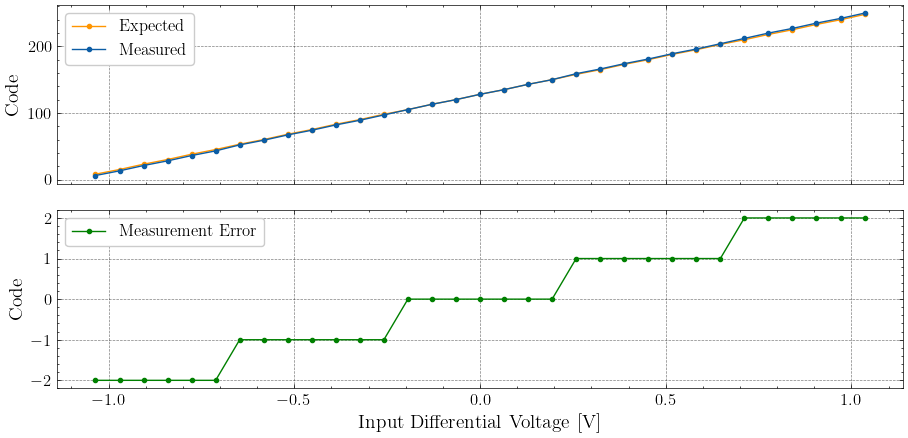

In [5]:
expected_np = np.array(expected_combined)
measured_np = np.array(measured_combined)
errors_np = measured_np - expected_np[:len(measured_np)]

voltages = np.linspace(-1.1, 1.1, len(expected_np))

fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_WIDTH*0.5), sharex=True)
ax1.plot(voltages[1:-1], expected_np[1:-1], label='Expected', marker='o', markersize=3, color='C2')
ax1.plot(voltages[1:-1], measured_np[1:-1], label='Measured', marker='o', markersize=3)
ax1.set_ylabel('Code')
ax1.legend()
ax2.plot(voltages[1:-1], errors_np[1:-1], label='Measurement Error', marker='o', markersize=3, color='green')
ax2.set_ylabel('Code')
ax2.set_xlabel('Input Differential Voltage [V]')
ax2.legend()
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), 'measurement_error')

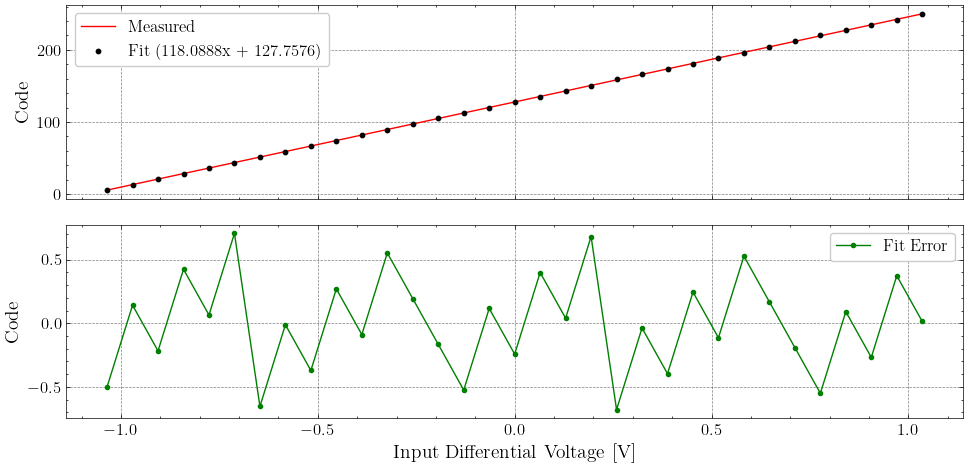

In [6]:
# Linear fit of the output
error_fit = np.polyfit(voltages[1:-1], errors_np[1:-1], 1)
measured_fit = np.polyfit(voltages[1:-1], measured_np[1:-1], 1)

fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

ax1.plot(voltages[1:-1], voltages[1:-1] * measured_fit[0] + measured_fit[1], label='Measured', color='red', markersize=3)
ax1.scatter(voltages[1:-1], measured_np[1:-1], label=f'Fit ({measured_fit[0]:.4f}x + {measured_fit[1]:.4f})', color='black', marker='o', s=10, zorder=5)
ax1.set_ylabel('Code')
ax1.legend()
ax2.plot(voltages[1:-1], (voltages[1:-1] * measured_fit[0] + measured_fit[1]) - measured_np[1:-1], label='Fit Error', marker='o', markersize=3, color='green')
ax2.set_ylabel('Code')
ax2.set_xlabel('Input Differential Voltage [V]')
ax2.legend()
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), 'measurement_fit')

In [7]:
N = 8
FSR = 1.1 - (-1.1)
ideal_lsb = FSR / (2**N - 1)
ideal_endpoint_slope = (2**N - 1) / FSR

In [8]:
# Endpoint method
V1 = voltages[1]
C1 = measured_np[1]
V2 = voltages[-2]
C2 = measured_np[-2]

C2 = C2 - C1
C1 = 0

measured_slope = (C2 - C1) / (V2 - V1)
gain_error_fraction = measured_slope / ideal_endpoint_slope - 1

print(f"{gain_error_fraction=:.2%}")

gain_error_fraction=1.67%


In [9]:
gain_error_fit = measured_fit[0] / ideal_endpoint_slope - 1

print(f"{gain_error_fit=:.2%}")

gain_error_fit=1.88%


In [10]:
dnls = np.diff(measured_np) / np.diff(expected_np) - 1
inls = np.diff(voltages * measured_fit[0] + measured_fit[1]) / np.diff(expected_np) - 1

dnls, inls

(array([-0.25      ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.125     ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.14285714,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.125     ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.14285714,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.28571429]),
 array([-0.04486965,  0.09157754, -0.04486965,  0.09157754, -0.04486965,
         0.09157754, -0.04486965,  0.09157754, -0.04486965,  0.09157754,
        -0.04486965,  0.09157754, -0.04486965,  0.09157754, -0.04486965,
         0.09157754, -0.04486965,  0.09157754, -0.04486965,  0.09157754,
        -0.04486965,  0.09157754, -0.04486965,  0.09157754, -0.04486965,
         0.09157754, -0.04486965,  0.09157754, -0.04486965,  0.09157754,
        -0.04486965,  0.09157754, -0.04486965,  0.09157754]))

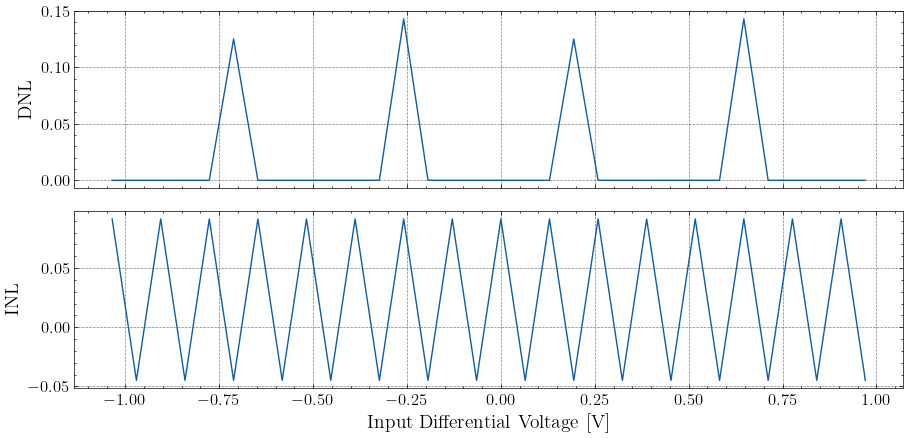

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_WIDTH * 0.5), sharex=True)
ax1.plot(voltages[1:-2], dnls[1:-1])
ax1.set_ylabel('DNL')
ax2.plot(voltages[1:-2], inls[1:-1])
ax2.set_ylabel('INL')
ax2.set_xlabel('Input Differential Voltage [V]')
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), 'dnl_inl')

[ 1.01880547 -2.40254175]


/tmp/ipykernel_751/3255706455.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_WIDTH*0.5), sharex=True)


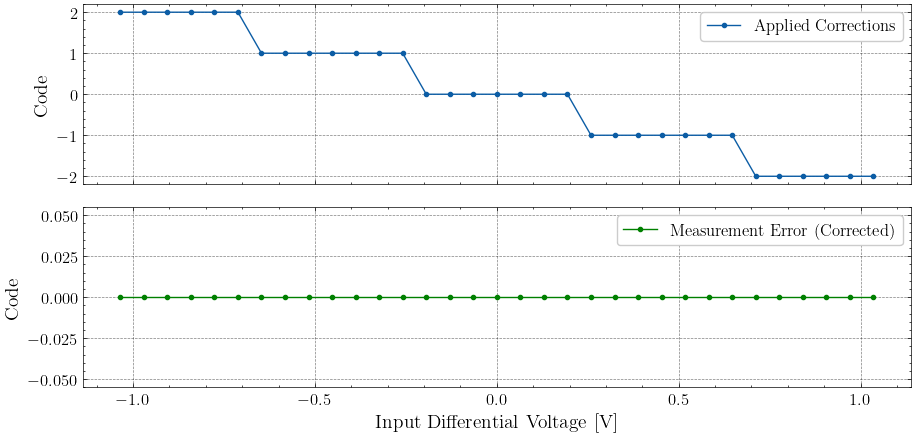

In [31]:
code_fit = np.polyfit(expected_np[1:-1], measured_np[1:-1], 1)

print(code_fit)

def correct_code(code, n, ge, off):
    return np.clip(np.round((code - off) / (1 + ge)), 0, 2**n - 1)

corrected_np = correct_code(measured_np, 8, code_fit[0] - 1, code_fit[1])
corrections_np = corrected_np - measured_np

errors_corrected_np = corrected_np - expected_np

fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_WIDTH*0.5), sharex=True)
# ax1.plot(voltages[1:-1], expected_np[1:-1], label='Expected', marker='o', markersize=3, color='C2')
ax1.plot(voltages[1:-1], corrections_np[1:-1], label='Applied Corrections', marker='o', markersize=3)
ax1.set_ylabel('Code')
ax1.legend()
ax2.plot(voltages[1:-1], errors_corrected_np[1:-1], label='Measurement Error (Corrected)', marker='o', markersize=3, color='green')
ax2.set_ylabel('Code')
ax2.set_xlabel('Input Differential Voltage [V]')
ax2.legend()
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), 'corrections')